<a href="https://colab.research.google.com/github/pranjul6386/GAN/blob/master/DcGAN_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.15.0       #used this tensorflow version

     |████████████████████████████████| 412.3MB 20kB/s 
     |████████████████████████████████| 3.8MB 53.4MB/s 
     |████████████████████████████████| 512kB 48.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c0410d83baa3fcd963dc0d4c70474d0ef64db3e8130793b66bdda85e4026eda0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installatio

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
!unzip "/content/drive/My Drive/kaggle_notebooks/dog-face-generation-competition-kid-metric-input.zip" #this fli is added for kaggles mifid score but then didnt use it

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt, zipfile
import os
import glob
import math
import random
import time
import datetime
import shutil
import imageio
from tqdm import tqdm, tqdm_notebook

from dataclasses import dataclass
from pathlib import Path
import warnings
from scipy import linalg

import xml.etree.ElementTree as ET 

import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape,\
Conv2DTranspose, Conv2D, Flatten, Dropout, Embedding, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.contrib.eager.python import tfe

#from IPython import display

# libraries for SpectralNorm
from tensorflow.keras import backend as K
from keras.engine import *
from keras.legacy import interfaces
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import constraints
from keras.utils.generic_utils import func_dump
from keras.utils.generic_utils import func_load
from keras.utils.generic_utils import deserialize_keras_object
from keras.utils.generic_utils import has_arg
from keras.utils import conv_utils

Using TensorFlow backend.


To enable eager execution  i.e not to run tf graphs with session

In [0]:
tf.enable_eager_execution()    

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!tar -xvf  '/content/drive/My Drive/annotation.tar' -C '/content'

Streaming output truncated to the last 5000 lines.
Annotation/n02108089-boxer/n02108089_15702
Annotation/n02108089-boxer/n02108089_1571
Annotation/n02108089-boxer/n02108089_1575
Annotation/n02108089-boxer/n02108089_1619
Annotation/n02108089-boxer/n02108089_1626
Annotation/n02108089-boxer/n02108089_1654
Annotation/n02108089-boxer/n02108089_1672
Annotation/n02108089-boxer/n02108089_1675
Annotation/n02108089-boxer/n02108089_1690
Annotation/n02108089-boxer/n02108089_1748
Annotation/n02108089-boxer/n02108089_1757
Annotation/n02108089-boxer/n02108089_1775
Annotation/n02108089-boxer/n02108089_1859
Annotation/n02108089-boxer/n02108089_1912
Annotation/n02108089-boxer/n02108089_1956
Annotation/n02108089-boxer/n02108089_200
Annotation/n02108089-boxer/n02108089_2007
Annotation/n02108089-boxer/n02108089_2056
Annotation/n02108089-boxer/n02108089_2106
Annotation/n02108089-boxer/n02108089_2355
Annotation/n02108089-boxer/n02108089_2360
Annotation/n02108089-boxer/n02108089_2367
Annotation/n02108089-boxe

In [0]:
!tar -xvf  '/content/drive/My Drive/images.tar' -C '/content'

Streaming output truncated to the last 5000 lines.
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n02109047-Great_Dane/n02109047_8090.jpg
Images/n0

In [0]:
image_width = 64
image_height = 64
image_channels = 3                                       
image_sample_size = 10000
image_output_dir = '/content/output_images/'
image_input_dir = '/content/Images/'
image_ann_dir = "/content/Annotation/"
OUT_DIR = Path(image_output_dir)
MODEL_PATH = "/content/classify_image_graph_def.pb"
TRAIN_DIR = Path(image_input_dir)

make a dictionaery to diffrentiate dogs by their species name and omit there ids


In [0]:
dog_breed_dict = {}
for annotation in os.listdir(image_ann_dir):
    annotations = annotation.split('-')
    dog_breed_dict[annotations[0]] = annotations[1]

for reading all images as well as converting to RGB channels

In [0]:
def read_image(src):
    img = cv2.imread(src)
    if img is None:
        raise FileNotFoundError
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [0]:
def load_cropped_images(dog_breed_dict=dog_breed_dict, image_ann_dir=image_ann_dir, sample_size=25000, 
                        image_width=image_width, image_height=image_height, image_channels=image_channels):
    curIdx = 0
    breeds = []
    dog_images_np = np.zeros((sample_size,image_width,image_height,image_channels))       #initialize the feature vector by zeros
  
    for breed_folder in os.listdir(image_ann_dir):
        for dog_ann in tqdm(os.listdir(image_ann_dir + breed_folder)):
            try:
                img = read_image(os.path.join(image_input_dir + "/"+breed_folder, dog_ann + '.jpg'))  #get an image by reaching the folder 
            except FileNotFoundError:
                continue
                
            tree = ET.parse(os.path.join(image_ann_dir + breed_folder, dog_ann))          #used XML parsing to form atree to find the bounding boxes
            root = tree.getroot()
            
            size = root.find('size')
            width = int(size.find('width').text)
            height = int(size.find('height').text)
            objects = root.findall('object')
            for o in objects:
                bndbox = o.find('bndbox') 
                
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)          #dimensions of the bounding boxes 
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)
                
                xmin = max(0, xmin - 4)        # 4 : margin
                xmax = min(width, xmax + 4)
                ymin = max(0, ymin - 4)
                ymax = min(height, ymax + 4)

                w = np.min((xmax - xmin, ymax - ymin))
                w = min(w, width, height)                     # available w

                if w > xmax - xmin:
                    xmin = min(max(0, xmin - int((w - (xmax - xmin))/2)), width - w)
                    xmax = xmin + w
                if w > ymax - ymin:
                    ymin = min(max(0, ymin - int((w - (ymax - ymin))/2)), height - w)
                    ymax = ymin + w
                
                img_cropped = img[ymin:ymin+w, xmin:xmin+w, :]      # [h,w,c]
                # Interpolation method
                if xmax - xmin > image_width:
                    interpolation = cv2.INTER_AREA          # shrink
                else:
                    interpolation = cv2.INTER_CUBIC         # expansion
                    
                img_cropped = cv2.resize(img_cropped, (image_width, image_height), 
                                         interpolation=interpolation)  # resize
                    
                dog_images_np[curIdx,:,:,:] = np.asarray(img_cropped)   #the finAL feature vector
                dog_breed_name = dog_breed_dict[dog_ann.split('_')[0]]     # name from that dictionary
                breeds.append(dog_breed_name)
                curIdx=curIdx+1
                
                
    return dog_images_np, breeds

In [0]:
start_time = time.time()
dog_images_np, breeds = load_cropped_images(sample_size=22126)    # call the above function
est_time = round(time.time() - start_time)
print("Feature loading time: {}.".format(str(datetime.timedelta(seconds=est_time))))

100%|██████████| 150/150 [00:00<00:00, 305.06it/s]

Feature loading time: 0:01:11.


In [0]:
print('Loaded features shape: ', dog_images_np.shape)
print('Loaded labels: ', len(breeds))

Loaded features shape:  (22126, 64, 64, 3)
Loaded labels:  22126


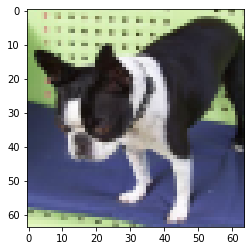

In [0]:
plt.imshow(dog_images_np[50]/255.0)

plotting the cropped images

In [0]:
def plot_features(features, labels, image_width=image_width, image_height=image_height, 
                image_channels=image_channels,
                examples=25, disp_labels=True): 
  
    if not math.sqrt(examples).is_integer():
        print('Please select a valid number of examples.')
        return
    
    imgs = []
    classes = []
    for i in range(examples):
        rnd_idx = np.random.randint(0, len(labels))
        imgs.append(features[rnd_idx, :, :, :])
        classes.append(labels[rnd_idx])
    
    
    fig, axes = plt.subplots(round(math.sqrt(examples)), round(math.sqrt(examples)),figsize=(15,15),
    subplot_kw = {'xticks':[], 'yticks':[]},
    gridspec_kw = dict(hspace=0.3, wspace=0.01))
    
    for i, ax in enumerate(axes.flat):
        if disp_labels == True:
            ax.title.set_text(classes[i])
        ax.imshow(imgs[i])

Plotting cropped images by their specified coordinates..


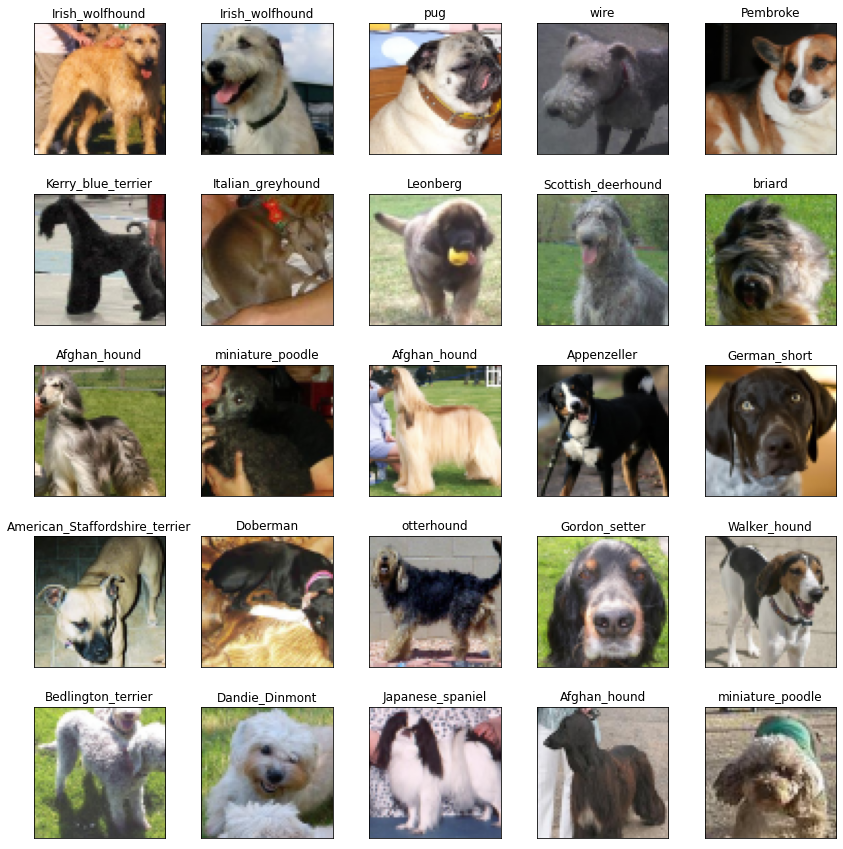

In [0]:
print('Plotting cropped images by their specified coordinates..')
plot_features(dog_images_np/255., breeds, examples=25, disp_labels=True)

As we are using tanh activation in generator so we will normalize the feature array btween [-1,1].

In [0]:
dog_images_np = (dog_images_np - 127.5) / 127.5    

Plotting cropped images by their specified coordinates..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

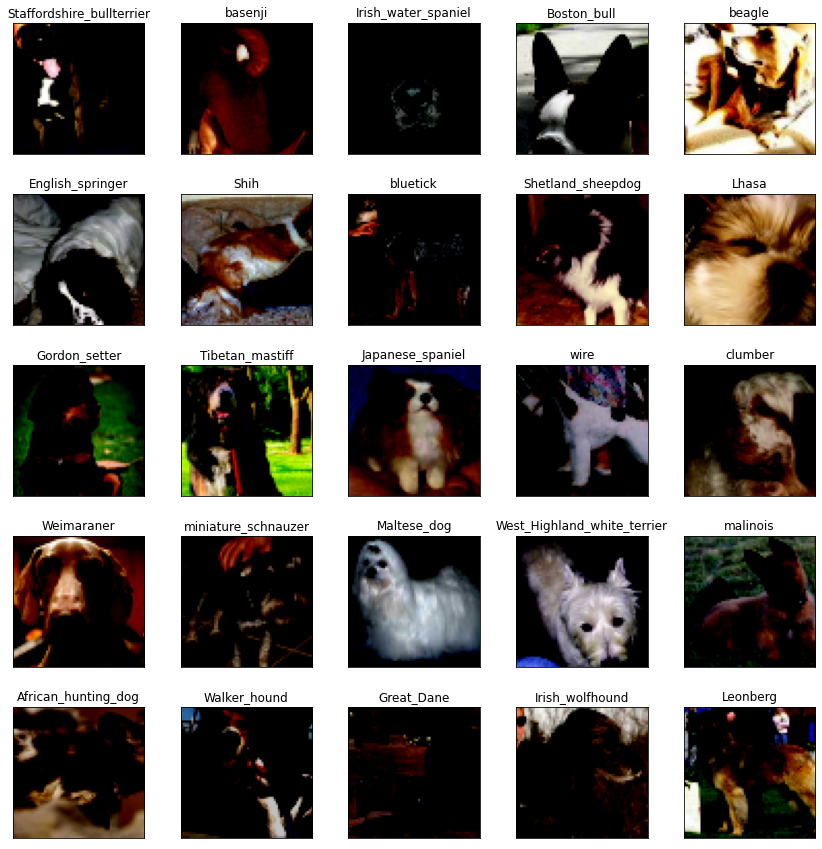

In [0]:
print('Plotting cropped images by their specified coordinates..')
plot_features(dog_images_np, breeds, examples=25, disp_labels=True)          #plotting the normalized images

In [0]:
print(np.max(dog_images_np[3,:,:,:]), np.min(dog_images_np[3,:,:,:]))    #to verify whether btween [-1,1]

1.0 -0.9921568627450981


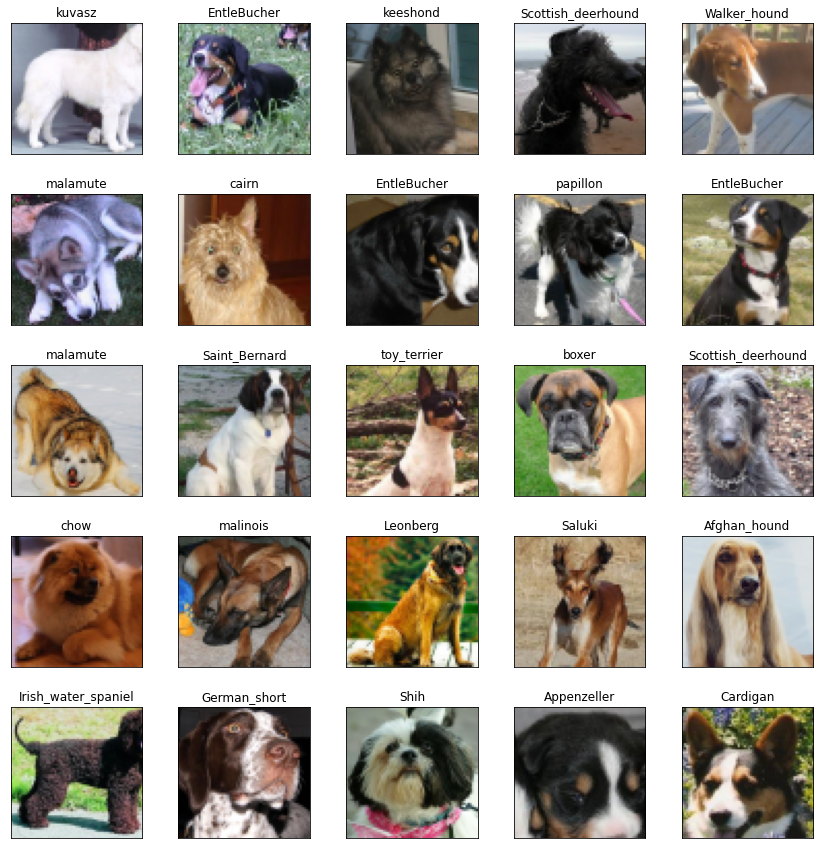

In [0]:
plot_features((dog_images_np * 127.5 + 127.5) / 255., breeds, examples=25, disp_labels=True)    # plotting normal dogs..

In [0]:
print("Dog features shape:", dog_images_np.shape)

Dog features shape: (22126, 64, 64, 3)


In [0]:
dog_features_tf = tf.cast(dog_images_np, 'float32')

   We could also apply Data Augmentation to our dataset.here we will flip our images i.e random horizontal flips

In [0]:
def flip(x: tf.Tensor) -> (tf.Tensor):
    x = tf.image.random_flip_left_right(x)
    return x

def zoom(x: tf.Tensor) -> (tf.Tensor):
    # Generate 20 crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(0.7, 1.0, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize([img], boxes=boxes, box_ind=np.zeros(len(scales)), crop_size=(64, 64))
        # Return a random crop
        return crops[tf.random_uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]


    choice = tf.random_uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return (tf.cond(choice < 0.5, lambda: x, lambda: random_crop(x)))

In [0]:
sample_size = 22126
batch_size = 128
weight_init_std = 0.02
weight_init_mean = 0.0
leaky_relu_slope = 0.2
downsize_factor = 2
dropout_rate = 0.5
scale_factor = 4 ** downsize_factor
lr_initial_d = tf.Variable(0.0002)
lr_initial_g = tf.Variable(0.0002)
lr_decay_steps = 1000
noise_dim = 128

In [0]:
#make tensorflow slice to feed data
dog_features_data = tf.data.Dataset.from_tensor_slices(dog_features_tf).shuffle(sample_size).map(flip).batch(batch_size, drop_remainder=True)

In [0]:
print(dog_features_data)

<DatasetV1Adapter shapes: (128, 64, 64, 3), types: tf.float32>


initialization of weights using truncated normal to make the standard deviation less than 2

In [0]:
weight_initializer = tf.keras.initializers.TruncatedNormal(stddev=weight_init_std, mean=weight_init_mean,
                                                          seed=42)                                        

   Spectral Normalization is a new type of weight initialization, designed specifically for GANs, which seems to further stabilize model training (you can read more from this paper). For a more detailed explanation on Spectral Normalization and why it works it also worth to check out this post, it has very intuitive examples.

   Spectral Normalization of a single weight in our network can be defined as the following:

σ(W)=||Wv||=uTWv 
WSN(W)=Wσ(W) 

   Here  u  and  v  are simple random vectors of the same size. They are utilized to perform what's called a power iteration operation on the specific weight, for each learning step and it proves to be a lot more computationally efficient than simply penalizing the gradients.

   Afterwards, in the backpropagation step, we use  WSN(W)  to update the weights instead of  W .

   For this project, I will reuse some custom Keras layers implemented by IShengFang (official code), to apply Spectral Normalization on top of Conv and Dense layers.

   Here is also a good example on the effect of Spectral Normalization:

With SN
![SNGAN](https://raw.githubusercontent.com/IShengFang/SpectralNormalizationKeras/master/img/generated_img_CIFAR10_resnet_SN_GP/loss.png)
Without SN
![StandardGAN](https://raw.githubusercontent.com/IShengFang/SpectralNormalizationKeras/master/img/generated_img_CIFAR10_resnet_noSN_GP/loss.png)

https://medium.com/@jonathan_hui/gan-spectral-normalization-893b6a4e8f53
This is the reccomended article for spetral normalization .

In [0]:
class DenseSN(Dense):
    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                                 initializer=initializers.RandomNormal(0, 1),
                                 name='sn',
                                 trainable=False)
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True
        
    def call(self, inputs, training=None):
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                 W_bar = K.reshape(W_bar, W_shape)  
        output = K.dot(inputs, W_bar)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output 
    
class ConvSN2D(Conv2D):

    def build(self, input_shape):
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs '
                             'should be defined. Found `None`.')
        input_dim = input_shape[channel_axis]
        kernel_shape = self.kernel_size + (input_dim, self.filters)

        self.kernel = self.add_weight(shape=kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.filters,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
            
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                         initializer=initializers.RandomNormal(0, 1),
                         name='sn',
                         trainable=False)
        
        # Set input spec.
        self.input_spec = InputSpec(ndim=self.rank + 2,
                                    axes={channel_axis: input_dim})
        self.built = True
    def call(self, inputs, training=None):
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            #Accroding the paper, we only need to do power iteration one time.
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        #Spectral Normalization
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                W_bar = K.reshape(W_bar, W_shape)
                
        outputs = K.conv2d(
                inputs,
                W_bar,
                strides=self.strides,
                padding=self.padding,
                data_format=self.data_format,
                dilation_rate=self.dilation_rate)
        if self.use_bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)
        if self.activation is not None:
            return self.activation(outputs)
        return outputs

class ConvSN2DTranspose(Conv2DTranspose):

    def build(self, input_shape):
        if len(input_shape) != 4:
            raise ValueError('Inputs should have rank ' +
                             str(4) +
                             '; Received input shape:', str(input_shape))
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs '
                             'should be defined. Found `None`.')
        input_dim = input_shape[channel_axis]
        kernel_shape = self.kernel_size + (self.filters, input_dim)

        self.kernel = self.add_weight(shape=kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.filters,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
            
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                         initializer=initializers.RandomNormal(0, 1),
                         name='sn',
                         trainable=False)
        
        # Set input spec.
        self.input_spec = InputSpec(ndim=4, axes={channel_axis: input_dim})
        self.built = True  
    
    def call(self, inputs):
        input_shape = K.shape(inputs)
        batch_size = input_shape[0]
        if self.data_format == 'channels_first':
            h_axis, w_axis = 2, 3
        else:
            h_axis, w_axis = 1, 2

        height, width = input_shape[h_axis], input_shape[w_axis]
        kernel_h, kernel_w = self.kernel_size
        stride_h, stride_w = self.strides
        if self.output_padding is None:
            out_pad_h = out_pad_w = None
        else:
            out_pad_h, out_pad_w = self.output_padding

        # Infer the dynamic output shape:
        out_height = conv_utils.deconv_length(height,
                                              stride_h, kernel_h,
                                              self.padding,
                                              out_pad_h)
        out_width = conv_utils.deconv_length(width,
                                             stride_w, kernel_w,
                                             self.padding,
                                             out_pad_w)
        if self.data_format == 'channels_first':
            output_shape = (batch_size, self.filters, out_height, out_width)
        else:
            output_shape = (batch_size, out_height, out_width, self.filters)
            
        #Spectral Normalization    
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            #Accroding the paper, we only need to do power iteration one time.
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                W_bar = K.reshape(W_bar, W_shape)
        self.kernel = W_bar
        
        outputs = K.conv2d_transpose(
            inputs,
            self.kernel,
            output_shape,
            self.strides,
            padding=self.padding,
            data_format=self.data_format)

        if self.use_bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)

        if self.activation is not None:
            return self.activation(outputs)
        return outputs

Layers architecture od conv,convsn,tranposed conv,transposedconvsn

In [0]:
def transposed_conv(model, out_channels, ksize, stride_size, ptype='same'):
    model.add(Conv2DTranspose(out_channels, (ksize, ksize),
                              strides=(stride_size, stride_size), padding=ptype, 
                              kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    return model

def transposed_convSN(model, out_channels, ksize, stride_size, ptype='same'):
    model.add(ConvSN2DTranspose(out_channels, (ksize, ksize), 
                              strides=(stride_size, stride_size), padding=ptype, 
                              kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    return model

def convSN(model, out_channels, ksize, stride_size):
    model.add(ConvSN2D(out_channels, (ksize, ksize), strides=(stride_size, stride_size), padding='same',
                     kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_slope))
  
    return model

def conv(model, out_channels, ksize, stride_size):
    model.add(Conv2D(out_channels, (ksize, ksize), strides=(stride_size, stride_size), padding='same',
                     kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_slope))
    return model

Define generator with keras api.

In [0]:
def DogGenerator():
    model = Sequential()
    model.add(Dense(image_width // scale_factor * image_height // scale_factor * 128,
                    input_shape=(noise_dim,), kernel_initializer=weight_initializer))
    #model.add(BatchNormalization(epsilon=BN_EPSILON, momentum=BN_MOMENTUM))
    #model.add(LeakyReLU(alpha=leaky_relu_slope))
    model.add(Reshape((image_height // scale_factor, image_width // scale_factor, 128)))
    
    model = transposed_conv(model, 512, ksize=5, stride_size=1)
    model.add(Dropout(dropout_rate))
    model = transposed_conv(model, 256, ksize=5, stride_size=2)
    model.add(Dropout(dropout_rate))
    model = transposed_conv(model, 128, ksize=5, stride_size=2)
    model = transposed_conv(model, 64, ksize=5, stride_size=2)
    model = transposed_conv(model, 32, ksize=5, stride_size=2)
    
    model.add(Dense(3, activation='tanh', kernel_initializer=weight_initializer))

    return model

In [0]:
dog_generator = DogGenerator()
print(dog_generator.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              264192    
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 512)         1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 512)         2048      
_________________________________________________________________
re_lu (ReLU)                 (None, 4, 4, 512)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 256)         3

Print a noise with the artitecture of generator wihtout backprop simply


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 64, 64, 3)
(1, 128) 0.05449438 0.96244806


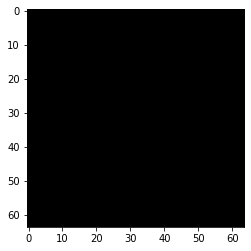

In [0]:
# random noise vector
noise = tf.random.normal([1,noise_dim])
#sample = generate_latent_points(100, 50)
# run the generator model with the noise vector as input
generated_image = dog_generator(noise, training=False)
plt.imshow(generated_image[0, :, :, :])
print(generated_image.shape)
print(noise.shape, tf.math.reduce_mean(noise).numpy(), tf.math.reduce_std(noise).numpy())

The discrminator model or while using spectral normalization we call it as critic.

In [0]:
def DogDiscriminator(spectral_normalization=True):
    model = Sequential()
    if spectral_normalization:
        model.add(ConvSN2D(64, (5, 5), strides=(1,1), padding='same', use_bias=False,
                         input_shape=[image_height, image_width, image_channels], 
                         kernel_initializer=weight_initializer))
        
        model.add(LeakyReLU(alpha=leaky_relu_slope))
        model = convSN(model, 64, ksize=5, stride_size=2)
        model = convSN(model, 128, ksize=5, stride_size=2)
        model = convSN(model, 256, ksize=5, stride_size=2)

        model.add(Flatten())
        model.add(DenseSN(1, activation='sigmoid'))
    else:
        model.add(Conv2D(64, (4, 4), strides=(2,2), padding='same', use_bias=False,
                         input_shape=[image_height, image_width, image_channels], 
                         kernel_initializer=weight_initializer))
        model.add(LeakyReLU(alpha=leaky_relu_slope))


        model = conv(model, 64, ksize=4, stride_size=2)
        model = conv(model, 128, ksize=4, stride_size=2)
        model = conv(model, 256, ksize=4, stride_size=2)

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
    return model

In [0]:
dog_discriminator = DogDiscriminator(spectral_normalization=False)
print(dog_discriminator.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3072      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        65536     
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         131072    
_________________________________________________________________
batch_normalization_6 (Batch (None, 8, 8, 128)        

One regularization method that can be applied during training is called Label smoothing. What this does is that it essentially prevents D from being overconfident or underconfident in its predictions. If D becomes too certain that there is a dog in a specific image, G can exploit that fact and continuously start to generate only images of that sort and in turn, cease to improve. We can combat this, by setting the class labels to be in the range [0, 0.3] for the negative classes and [0.7, 1] for the positive ones.

In [0]:
# Label smoothing -- technique from GAN hacks, instead of assigning 1/0 as class labels, we assign a random integer in range [0.7, 1.0] for positive class
# and [0.0, 0.3] for negative class

def smooth_positive_labels(y):
    return y - 0.3 + (np.random.random(y.shape) * 0.5)

def smooth_negative_labels(y):
    return y + np.random.random(y.shape) * 0.3

&nbsp;&nbsp;&nbsp;This technique is also called <b>Instance Noise</b>. By adding a small amount of error to the labels (let's say 5%), this tends to make the true and predicted distributions more spread out and thus start to overlap with each other. This in turn makes fitting a custom distribution of generated images easier in the learning process.

&nbsp;&nbsp;&nbsp;Here is a good example of how the two distributions look like with these techniques:

![Smoothing and noise effect on distributions](https://www.inference.vc/content/images/2016/10/instance_noise.png)

In [0]:
def noisy_labels(y, p_flip):
    # determine the number of labels to flip
    n_select = int(p_flip * int(y.shape[0]))
    # choose labels to flip
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)
    
    op_list = []
    # invert the labels in place
    #y_np[flip_ix] = 1 - y_np[flip_ix]
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1, y[i]))
        else:
            op_list.append(y[i])
    
    outputs = tf.stack(op_list)
    return outputs

Defining optimizers

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_initial_g, beta_1=0.5)
discriminator_optimizer =tf.keras.optimizers.Adam(learning_rate=lr_initial_d, beta_1=0.5)
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

 Another new trend in optimizing GANs recently has been applying a Relativistic loss function as opposed to the standard one. Those functions measure the probability that the real data is more "realistic" than the generated data. One of the more popular relativistic function choices include RaLSGAN (Relativistic Average Least Squares), RaSGAN (Relativistic Average Standard) and RaHinge (Relativistic Hinge loss).
 But here i will use normal GAN loss .
 

Disrimnator loss

In [0]:
def discriminator_loss(real_output, fake_output, loss_func, apply_label_smoothing=True, label_noise=True):
    if label_noise and apply_label_smoothing:
        real_output_noise = noisy_labels(tf.ones_like(real_output), 0.05)
        fake_output_noise = noisy_labels(tf.zeros_like(fake_output), 0.05)
        real_output_smooth = smooth_positive_labels(real_output_noise)
        fake_output_smooth = smooth_negative_labels(fake_output_noise)
        if loss_func == 'gan':                                   #u can use another loss function with its code here
            real_loss = cross_entropy(tf.ones_like(real_output_smooth), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_smooth), fake_output)
   
        total_loss = real_loss + fake_loss
        return total_loss
    elif label_noise and not apply_label_smoothing:
        real_output_noise = noisy_labels(tf.ones_like(real_output), 0.05)
        fake_output_noise = noisy_labels(tf.zeros_like(fake_output), 0.05)
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_noise), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_noise), fake_output)
 
        total_loss = real_loss + fake_loss
        return total_loss
    elif apply_label_smoothing and not label_noise:
        real_output_smooth = smooth_positive_labels(tf.ones_like(real_output))
        fake_output_smooth = smooth_negative_labels(tf.zeros_like(fake_output))
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_smooth), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_smooth), fake_output)
       
        total_loss = real_loss + fake_loss
        return total_loss    
    else:
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
      
        total_loss = real_loss + fake_loss
        return total_loss

Generator loss

In [0]:
def generator_loss(real_output, fake_output, loss_func, apply_label_smoothing=True):
    if apply_label_smoothing:
        fake_output_smooth = smooth_negative_labels(tf.ones_like(fake_output))
        if loss_func == 'gan':
            return cross_entropy(tf.ones_like(fake_output_smooth), fake_output)
       
    else:           
        if loss_func == 'gan':
            return cross_entropy(tf.ones_like(fake_output), fake_output)

Save the checkpoints in the directory specified

In [0]:
checkpoint_dir = '/content/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=dog_generator,
                                 discriminator=dog_discriminator)

In [0]:
EPOCHS = 300
num_examples_to_generate = 64
seed = tf.random.normal([num_examples_to_generate, noise_dim])

Final training function arrived
 One training step of a DCGAN consists of three standard steps:

1. Forward prop - G creates a batch of fake images; this, 
2.alongside a batch of real images is fed to D.Calculate both G and D's loss function.
3. Backprop - compute gradients for G and D optimize the weights.

In [0]:
def train_step(images, loss_type='gan'):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = dog_generator(noise, training=True)
        
        real_output = dog_discriminator(images, training=True)
        fake_output = dog_discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(real_output, fake_output, loss_type, apply_label_smoothing=True)
        disc_loss = discriminator_loss(real_output, fake_output, loss_type, 
                                       apply_label_smoothing=True, label_noise=True)
 
    gradients_of_generator = gen_tape.gradient(gen_loss, dog_generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, dog_discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, dog_generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, dog_discriminator.trainable_variables))
    
    return gen_loss, disc_loss

PLotting functions for lossses of generator and discrimanator


In [0]:
def plot_losses(G_losses, D_losses, all_gl, all_dl, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH {}".format(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    ymax = plt.ylim()[1]
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(all_gl)),all_gl,label='G')
    plt.plot(np.arange(len(all_dl)),all_dl,label='D')
    plt.legend()
    #plt.ylim((0,np.min([1.1*np.max(all_gl),2*ymax])))
    plt.title('All Time Loss')
    plt.show()

In [0]:
def generate_and_save_images(model, epoch, test_input, rows, cols):
    # training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(14,14))
    for i in range(predictions.shape[0]):
        plt.subplot(rows, cols, i+1)
        plt.imshow((predictions[i, :, :, :] * 127.5 + 127.5) / 255.)
        plt.axis('off') 
        
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [0]:
def generate_test_image(model, noise_dim=noise_dim):
    test_input = tf.random.normal([1, noise_dim])
    # training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(5,5))
    plt.imshow((predictions[0, :, :, :] * 127.5 + 127.5) / 255.)
    plt.axis('off') 
    plt.show()

In [0]:
def zip_images(filename='images.zip'):
    z = zipfile.PyZipFile(filename, mode='w')
    for k in range(image_sample_size):
        generated_image = dog_generator(tf.random.normal([1, noise_dim]), training=False)
        f = str(k)+'.png'
        img = np.array(generated_image)
        img = (img[0, :, :, :] + 1.) / 2.
        img = Image.fromarray((255*img).astype('uint8').reshape((image_height,image_width,image_channels)))
        img.save(f,'PNG')
        z.write(f)
        os.remove(f)
    z.close()
    print('Saved final images for submission.')
    
def save_images(directory=OUT_DIR):
    for k in range(image_sample_size):
        generated_image = dog_generator(tf.random.normal([1, noise_dim]), training=False)
        f = str(k)+'.png'
        f = os.path.join(directory, f)
        img = np.array(generated_image)
        img = (img[0, :, :, :] + 1.) / 2.
        img = Image.fromarray((255*img).astype('uint8').reshape((image_height,image_width,image_channels)))
        img.save(f,'PNG')
        #if k % 1000==0: print(k)
    print('Saved temporary images for evaluation.')

## Model training and avoiding Mode Collapse

Learning rate decay:
This one is experimental and doesn't always help improve performance, but I don't think it would hurt either way. The idea here is to decrease the learning rate by a very small amount for each training step/steps, in order to stabilize the training process and speed up convergence (and escape from local minima). For this project, I am using the Cosine learning rate decay in Tensorflow to reduce the learning rate for every decay_step iterations.

In [0]:
display_results = 40
replay_step = 50
decay_step = 50



def train(dataset, epochs, retrain=False):
    all_gl = np.array([]); all_dl = np.array([])
    last_saved_epoch = 300
    exp_replay = []
    for epoch in tqdm(range(epochs)):
        
        G_loss = []; D_loss = []
        
        start = time.time()
        new_lr_d = lr_initial_d
        new_lr_g = lr_initial_g
        global_step = 0
        
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            global_step = global_step + 1
            G_loss.append(g_loss); D_loss.append(d_loss)
            all_gl = np.append(all_gl,np.array([G_loss]))
            all_dl = np.append(all_dl,np.array([D_loss]))
        
        # generate an extra image for each epoch and store it in memory for experience replay
        
        '''
        generated_image = dog_generator(tf.random.normal([1, noise_dim]), training=False)
        exp_replay.append(generated_image)
        if len(exp_replay) == replay_step:
            print('Executing experience replay..')
            replay_images = np.array([p[0] for p in exp_replay])
            dog_discriminator(replay_images, training=True)
            exp_replay = []    
        '''
         
        #display.clear_output(wait=True)
        if (epoch + 1) % display_results == 0 or epoch == 0:
            plot_losses(G_loss, D_loss, all_gl, all_dl, epoch + 1)
            if retrain:
              generate_and_save_images(dog_generator, cur_epoch + 1, seed, rows=8, cols=8)
            else:
              generate_and_save_images(dog_generator, epoch + 1, seed, rows=8, cols=8)

        
        # Cosine learning rate decay
        if (epoch + 1) % decay_step == 0:
            new_lr_d = tf.train.cosine_decay(new_lr_d, min(global_step, lr_decay_steps), lr_decay_steps)
            new_lr_g = tf.train.cosine_decay(new_lr_g, min(global_step, lr_decay_steps), lr_decay_steps)
            generator_optimizer = tf.train.AdamOptimizer(learning_rate=new_lr_d, beta1=0.5)
            discriminator_optimizer = tf.train.AdamOptimizer(learning_rate=new_lr_g, beta1=0.5)          

        print('Epoch: {} computed for {} sec'.format(epoch + 1, time.time() - start))
        print('Gen_loss mean: ', np.mean(G_loss),' std: ', np.std(G_loss))
        print('Disc_loss mean: ', np.mean(D_loss),' std: ', np.std(D_loss))

    # Generate after the final epoch
    #display.clear_output(wait=True)
    #final_seed = tf.random.normal([64, noise_dim])
    if retrain:
      generate_and_save_images(dog_generator, cur_epoch + 1, seed, rows=8, cols=8)
    else:
      generate_and_save_images(dog_generator, epochs, seed, rows=8, cols=8)
    
    OUT_DIR.mkdir(exist_ok=True)
    save_images(OUT_DIR)
    shutil.rmtree(OUT_DIR)
    print('Removed temporary image directory.')
    checkpoint.save(file_prefix = checkpoint_prefix)
    
    
    print('Final epoch.')

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [0]:
#%%time
train(dog_features_data, EPOCHS)

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

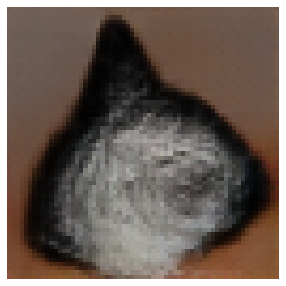

In [0]:
generate_test_image(dog_generator)

In [0]:
zip_images()

Saved final images for submission.


In [0]:
def display_image(epoch_no):
    return Image.open('./training_checkpoints/image_at_epoch_{:04d}.png'.format(epoch_no))

create a gif

In [0]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 1*(i**2)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
    IPython.display.Image(filename=anim_file)

In [0]:
anim_file

'dcgan.gif'